# Stock Market Analysis Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
tesla = web.DataReader("TSLA",'yahoo',start,end)

In [4]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [6]:
ford = web.DataReader("F",'yahoo',start,end)
gm = web.DataReader("GM",'yahoo',start,end)

In [7]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [9]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


## Visualizing the Data

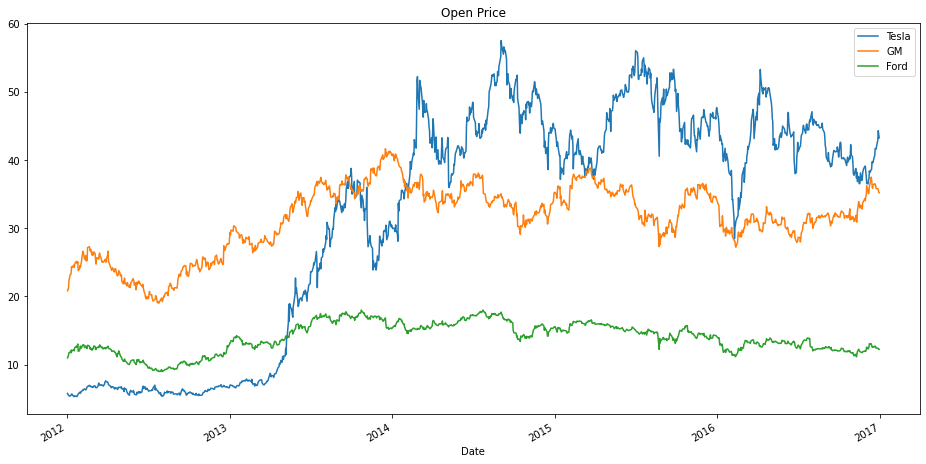

In [22]:
tesla['Open'].plot(label = 'Tesla',figsize = (16,8), title = 'Open Price')
gm['Open'].plot(label = 'GM')
ford['Open'].plot(label = 'Ford')
plt.legend()

____

## Plot the Volume of stock traded each day.

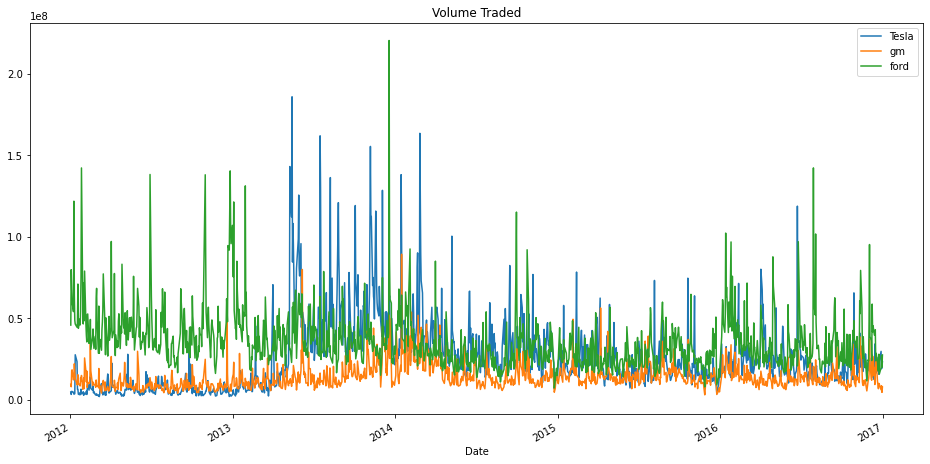

In [26]:
tesla['Volume'].plot(label = 'Tesla', figsize = (16,8), title = 'Volume Traded')
gm['Volume'].plot(label = 'gm')
ford['Volume'].plot(label = 'ford')
plt.legend()

#### looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**


In [28]:
ford['Volume'].argmax()

493

#### The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \10 usd each versus 100000 units of stock at 1 usd each)

In [29]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = tesla['Open']*tesla['Volume']
gm['Total Traded'] = tesla['Open']*tesla['Volume']

## Plot this "Total Traded" against the time index.

Text(0, 0.5, 'Total Traded')

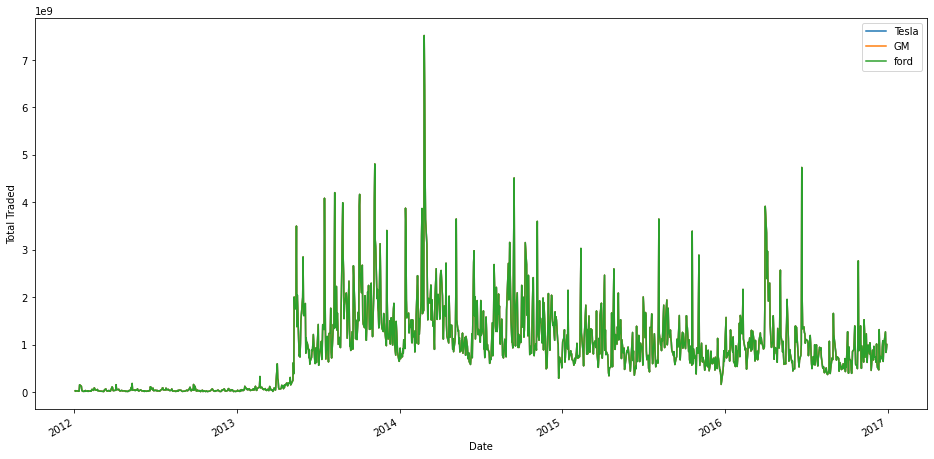

In [31]:
tesla['Total Traded'].plot(label = 'Tesla', figsize = (16,8))
gm['Total Traded'].plot(label = 'GM')
ford['Total Traded'].plot(label = 'ford')
plt.legend()
plt.ylabel('Total Traded')

#### Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? 

In [32]:
tesla['Total Traded'].argmax()

538

#### Moving averages

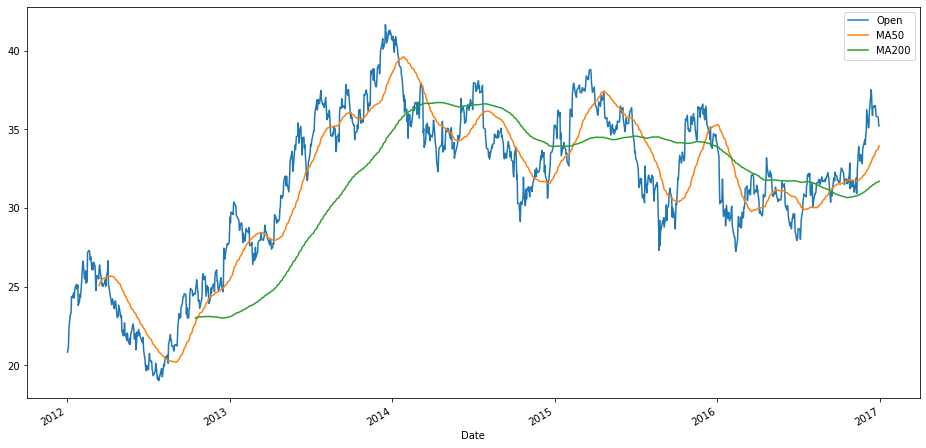

In [33]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label = 'gm',figsize = (16,8))

#### Checking to see if there is a relationship between these stocks. We will use a scatter plot to plot this. 

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
car_comp = pd.concat([tesla['Open'], gm['Open'],ford['Open']], axis = 1)

In [36]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

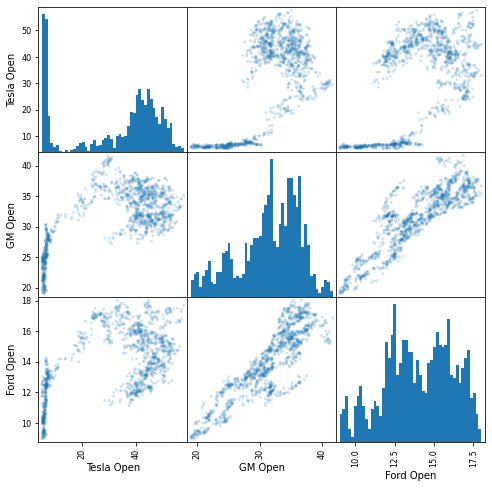

In [37]:
scatter_matrix(car_comp, figsize = (8,8), alpha = 0.2,hist_kwds = {'bins':50});

In [12]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [55]:
# Reset the index to a column of January Dates
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

#Create a new column of numerical "date" values for matplotlib to use
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]

In [56]:
mondays = WeekdayLocator(MONDAY) # major ticks on mondays
alldays = DayLocator()  # minor ticks on days
weekFormatter = DateFormatter('%b %d')   # e.g Jan 12
dayFormatter = DateFormatter('%d')    # e.g 12

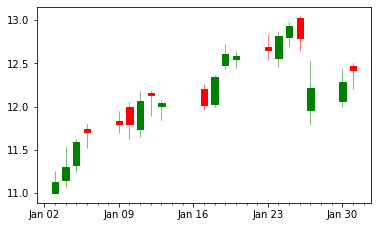

In [58]:
# plot it

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. 

In [59]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [60]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [61]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [62]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [63]:
gm['returns'] = gm['Close'].pct_change(1)

In [64]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,2.685921e+07,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.777512e+07,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,2.791268e+07,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,2.682736e+07,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.421900e+07,NaN,NaN,-0.003490


In [65]:
ford['returns'] = ford['Close'].pct_change(1)
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,2.685921e+07,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,1.777512e+07,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,2.791268e+07,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,2.682736e+07,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,2.421900e+07,0.007686


#### H

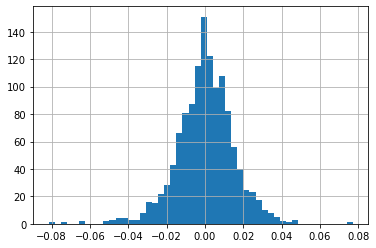

In [66]:
ford['returns'].hist(bins = 50)

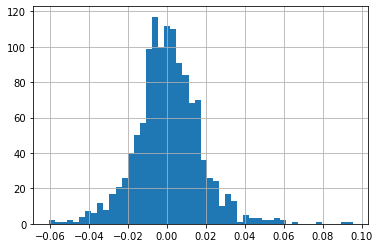

In [67]:
gm['returns'].hist(bins = 50)

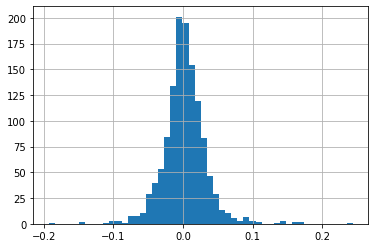

In [68]:
tesla['returns'].hist(bins = 50)

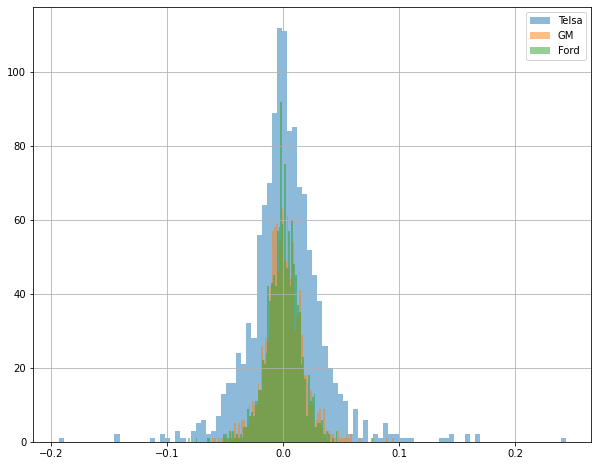

In [71]:
tesla['returns'].hist(bins = 100, label = 'Telsa', figsize = (10,8),alpha = 0.5)
gm['returns'].hist(bins = 100, label = 'GM',alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'Ford',alpha = 0.5)
plt.legend()

#### Plotting a KDE instead of a histogram for better visualization

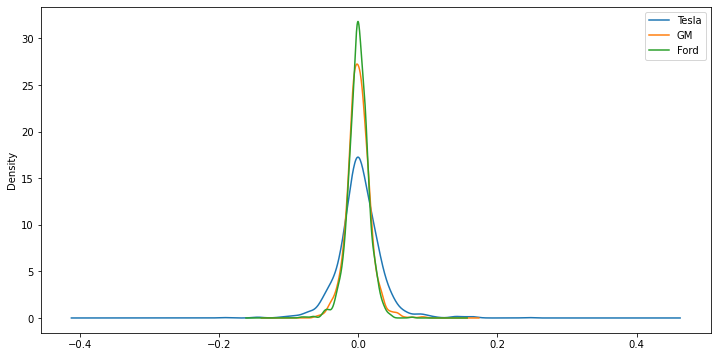

In [72]:
tesla['returns'].plot(kind = 'kde', label = 'Tesla', figsize = (12,6))
gm['returns'].plot(kind = 'kde', label = 'GM')
ford['returns'].plot(kind = 'kde',label = 'Ford')
plt.legend()

#### Box plots

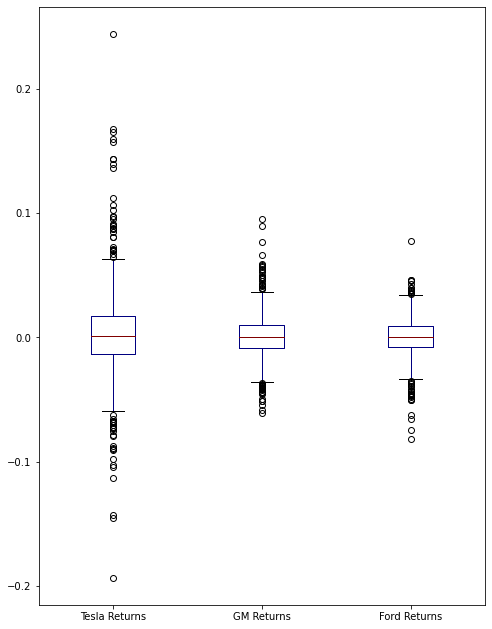

In [73]:
box_df = pd.concat([tesla['returns'], gm['returns'],ford['returns']],axis = 1)
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind = 'box',figsize = (8,11),colormap = 'jet')

## Comparing Daily Returns between Stocks


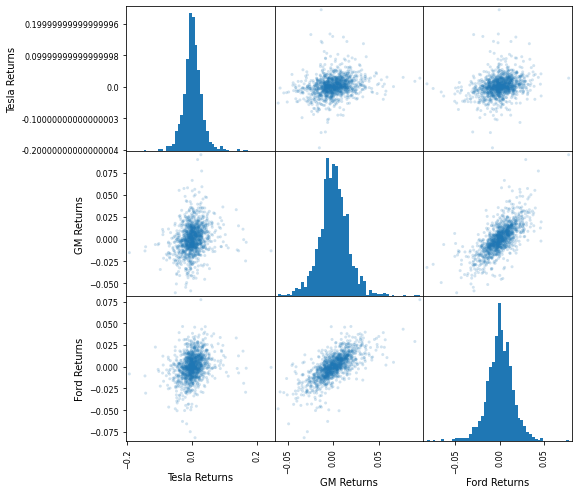

In [75]:
scatter_matrix(box_df, figsize = (8,8),alpha = 0.2, hist_kwds = {'bins':50});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!

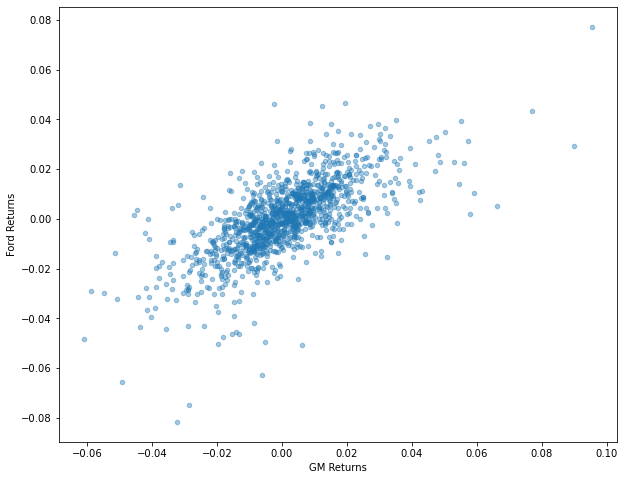

In [76]:
box_df.plot(kind = 'scatter', x = 'GM Returns',y = 'Ford Returns', alpha = 0.4,figsize = (10,8))

____
## Cumulative Daily Returns

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

In [77]:
tesla['cumulative Return'] = (1 + tesla['returns']).cumprod()

In [78]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,cumulative Return
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635,0.970442


In [81]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford.head()
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,2.685921e+07,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.777512e+07,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,2.791268e+07,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,2.682736e+07,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.421900e+07,NaN,NaN,-0.003490,1.085036


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

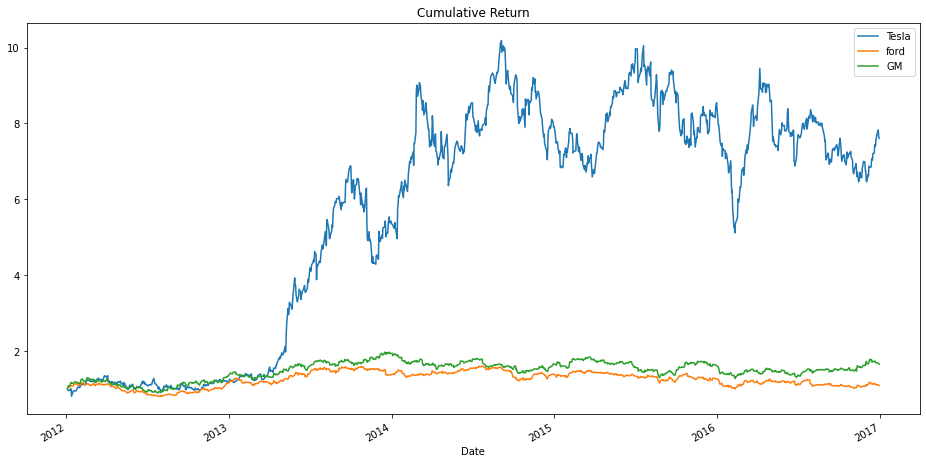

In [83]:
tesla['cumulative Return'].plot(label = 'Tesla',figsize = (16,8),title = 'Cumulative Return')
ford['Cumulative Return'].plot(label = 'ford')
gm['Cumulative Return'].plot(label = 'GM')
plt.legend()